In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data_train= pd.DataFrame({'diameter':[6,8,10,14,18],'price':[7,9,13,17.5,18]})
data_train

,diameter,price
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


In [27]:
X_train = data_train.diameter.values.reshape(5,1)

In [28]:
y_train = data_train.price.values.reshape(5,1)

In [29]:
data_test= pd.DataFrame({'diameter':[6,8,11,16],'price':[8,12,15,18]})
data_test

,diameter,price
0,6,8
1,8,12
2,11,15
3,16,18


In [30]:
X_test = data_test.diameter.values.reshape(4,1)

In [31]:
y_test = data_test.price.values.reshape(4,1)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [33]:
regressor = LinearRegression()

In [34]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
xx = np.linspace(0, 26, 100)
xx = xx.reshape(100,1)

In [37]:
yy = regressor.predict(xx)

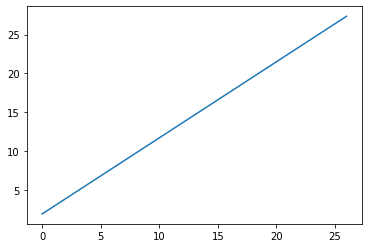

In [38]:
plt.plot(xx, yy)

In [40]:
quadratic_featurizer = PolynomialFeatures(degree=2)

In [41]:
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)

In [42]:
X_test_quadratic = quadratic_featurizer.transform(X_test)

In [21]:
regressor_quadratic = LinearRegression()

In [43]:
regressor_quadratic.fit(X_train_quadratic, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
xx_quadratic = quadratic_featurizer.transform(xx)

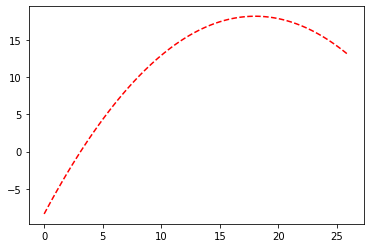

In [45]:
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r',linestyle='--')

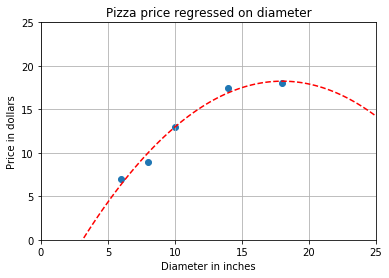

In [46]:
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r',linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()

In [47]:
print(X_train)
print(X_train_quadratic)
print(X_test)
print( X_test_quadratic)
print('Simple linear regression r-squared', regressor.score(X_test, y_test))
print('Quadratic regression r-squared', regressor_quadratic.score(X_test_quadratic, y_test))

[[ 6]
 [ 8]
 [10]
 [14]
 [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[ 6]
 [ 8]
 [11]
 [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
Simple linear regression r-squared 0.809726797707665
Quadratic regression r-squared 0.8675443656345073
